In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("Hotel Reservations.csv")
print(df)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

In [7]:
df.head()
print(df)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

In [8]:
df.tail()
print(df)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

In [5]:
unique_values=df['type_of_meal_plan'].unique()
print(unique_values)


['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [6]:
df['type_of_meal_plan']=df['type_of_meal_plan'].replace({'No Selected':0,'Meal Plan 1':1,'Meal Plan 2':2,'Meal Plan 3':3})
print(df['type_of_meal_plan'])

0                   1
1        Not Selected
2                   1
3                   1
4        Not Selected
             ...     
36270               1
36271               1
36272               1
36273    Not Selected
36274               1
Name: type_of_meal_plan, Length: 36275, dtype: object


In [7]:
unique_values=df['room_type_reserved'].unique()
print(unique_values)

['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


In [8]:
df['room_type_reserved']=df['room_type_reserved'].replace({'Room_Type 1':1,'Room_Type 4':4,'Room_Type 2':2,'Room_Type 6':6,'Room_Type 5':5,'Room_Type 7':7,'Room_Type 3':3})
print(df['room_type_reserved'])

0        1
1        1
2        1
3        1
4        1
        ..
36270    4
36271    1
36272    1
36273    1
36274    1
Name: room_type_reserved, Length: 36275, dtype: int64


In [9]:
unique_values=df['market_segment_type'].unique()
print(unique_values)

['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [10]:
df['market_segment_type']=df['market_segment_type'].replace({'Offline':1,'Online':2,'Corporate':3,'Aviation':4,'Complementary':5})
print(df['market_segment_type'])

0        1
1        2
2        2
3        2
4        2
        ..
36270    2
36271    2
36272    2
36273    2
36274    1
Name: market_segment_type, Length: 36275, dtype: int64


In [11]:
unique_values=df['booking_status'].unique()
print(unique_values)

['Not_Canceled' 'Canceled']


In [12]:
df['booking_status']=df['booking_status'].replace({'Not_Canceled':0,'Canceled':1})
print(df['booking_status'])

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64


In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
%%cmd
pip install xgboost

Microsoft Windows [Version 10.0.22621.2428]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Sahil>pip install xgboost
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 99.8/99.8 MB 10.4 MB/s eta 0:00:00

C:\Users\Sahil>

In [14]:
def one_hot_encode_dataframe(df,exclude_columns=[]):
    object_columns=df.select_dtypes(include=['object']).columns
    columns_to_encode=[col for col in object_columns if col not in exclude_columns]
    df_encoded=pd.get_dummies(df,columns=columns_to_encode)
    return df_encoded
df_encoded=one_hot_encode_dataframe(df,exclude_columns=['Booking_ID','booking_status'])

In [15]:
df_encoded.to_csv('df_encoded.csv', index=False)

In [16]:
df_encoded['booking_status'] = df_encoded['booking_status'].replace({
    'Not_Canceled': 0,
    'Canceled': 1,
})
print(df_encoded['booking_status'])

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Prepare your features (X) and target variable (y)
X = df_encoded.drop(['Booking_ID', 'booking_status'], axis=1)
y = df_encoded['booking_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)


In [18]:
print("Accuracy:", accuracy)

Accuracy: 0.7615547183680971


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df_encoded' is the one-hot encoded DataFrame
X = df_encoded.drop(['Booking_ID', 'booking_status'], axis=1)
y = df_encoded['booking_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)


In [20]:
print("Accuracy:", accuracy)

Accuracy: 0.9047553411440385


In [21]:
#using corss validation to predict as well 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming 'df_encoded' is the one-hot encoded DataFrame
X = df_encoded.drop(['Booking_ID', 'booking_status'], axis=1)
y = df_encoded['booking_status']

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=33)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.9007581  0.9026878  0.90103377 0.90503101 0.89965541]
Average accuracy: 0.9018332184700206


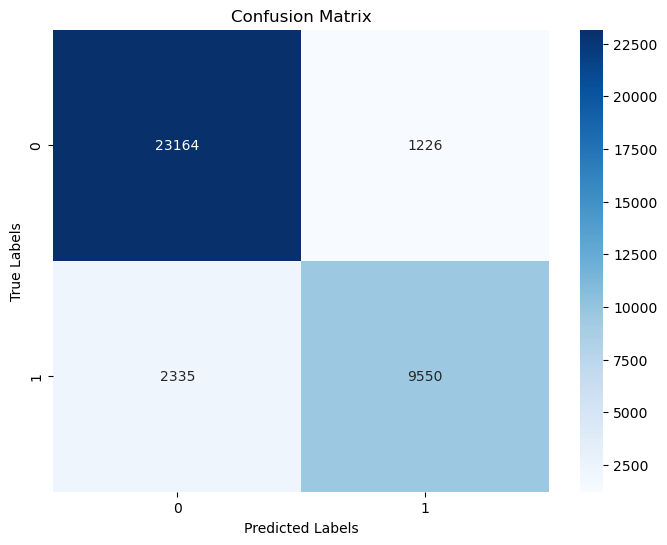

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_encoded' is the one-hot encoded DataFrame
X = df_encoded.drop(['Booking_ID', 'booking_status'], axis=1)
y = df_encoded['booking_status']

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=33)

# Perform cross-validation predictions
y_pred = cross_val_predict(rf_model, X, y, cv=5)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [25]:
import seaborn as sns

<Axes: xlabel='no_of_adults', ylabel='arrival_month'>

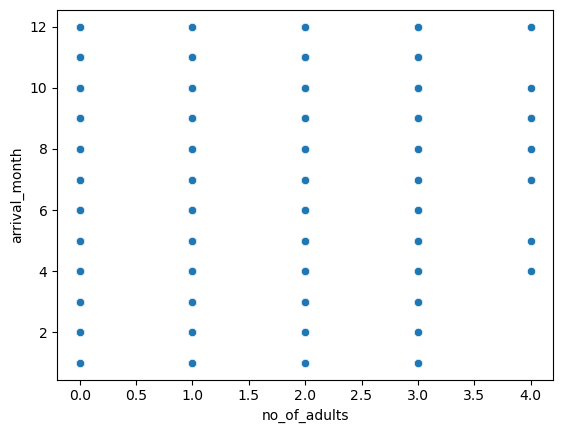

In [26]:
sns.scatterplot(x="no_of_adults",y="arrival_month",data=df)

<Axes: xlabel='no_of_adults', ylabel='Count'>

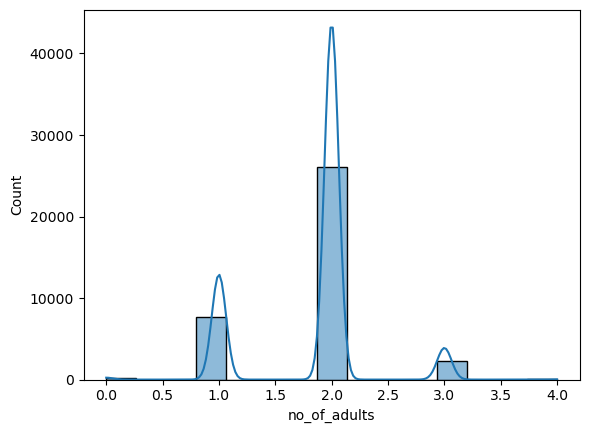

In [28]:
sns.histplot(df['no_of_adults'],kde=True,bins=15)

C:\Users\Sahil\AppData\Local\Temp\ipykernel_6100\1199021879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no_of_adults'],kde=True,bins=15)


<Axes: xlabel='no_of_adults', ylabel='Density'>

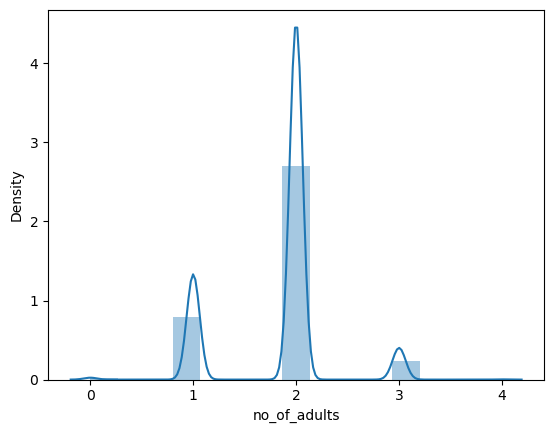

In [29]:
sns.distplot(df['no_of_adults'],kde=True,bins=15)

<Axes: xlabel='no_of_adults', ylabel='arrival_month'>

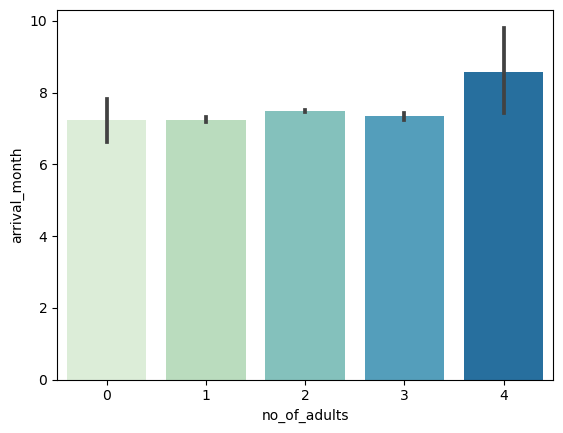

In [30]:
sns.barplot(x="no_of_adults",y="arrival_month",data=df,palette="GnBu")

<Axes: xlabel='no_of_adults', ylabel='arrival_month'>

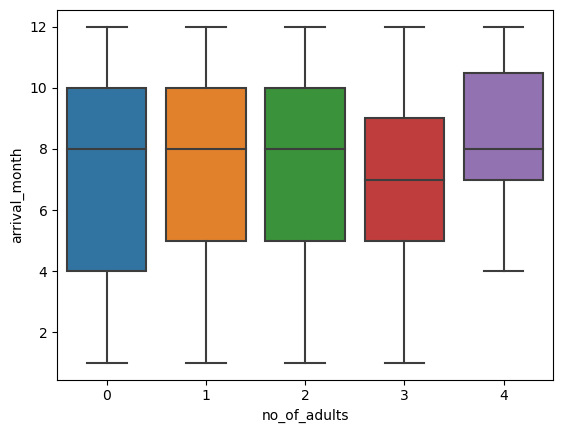

In [32]:
sns.boxplot(x="no_of_adults",y="arrival_month",data=df)

<Axes: xlabel='no_of_adults', ylabel='arrival_month'>

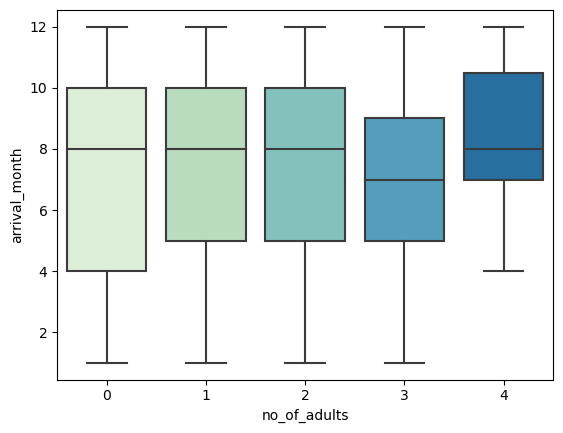

In [34]:
sns.boxplot(x="no_of_adults",y="arrival_month",data=df,palette="GnBu")

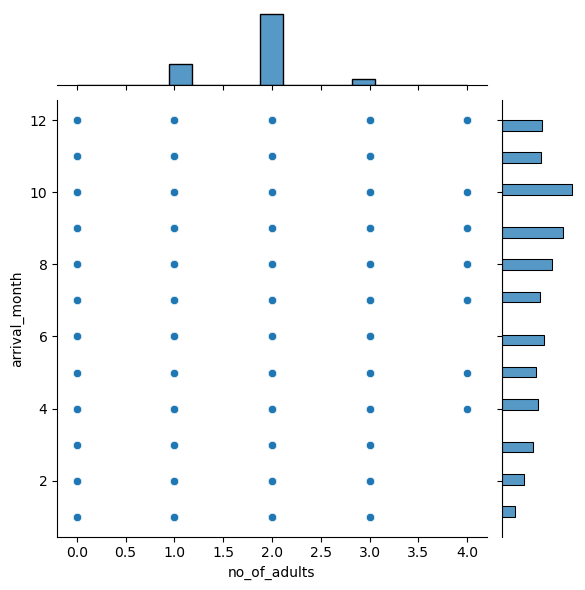

In [35]:
sns.jointplot(x="no_of_adults",y="arrival_month",data=df)

In [36]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'INN00001'